# PENDAHULUAN

Fraud detection adalah proses mengidentifikasi tindakan pengguna dalam suatu skenario dikategorikan sebagai tindakan penipuan atau bukan. Dalam konteks kompetisi ini, tindakan penipuan didefinisikan sebagai pengguna platform yang telah meminjam produk keuangan tetapi tercatat belum melakukan pembayaran sampai tenggat waktu yang telah ditentukan.

Machine learning memainkan peran penting dalam mengatasi permasalahan fraud detection. Salah satu model machine learning yang dapat digunakan untuk menyelesaikan permasalahan ini adalah logistic regression. Logistic regression adalah model pembelajaran mesin untuk klasifikasi. Model ini digunakan untuk memprediksi kemungkinan variabel dependen kategorikal. (Kumar et al. 2020).

Model logistic regression dipilih karena regresi logistik mudah diterapkan dan hasilnya mudah diinterpretasikan. Hal ini penting dalam deteksi penipuan, dimana memahami hubungan antara prediktor dan kemungkinan penipuan bisa menjadi sangat penting. Selain itu, regresi logistik menampilkan skor presisi rata-rata yang lebih baik dari beberapa algoritma yang telah digunakan.


# LOAD DATASET

In [ ]:
!pip install gdown

import os
import gdown
import zipfile
import logging
from genericpath import isdir

def download_data(url, filename, dir_name: str = "data") -> None:
    if not os.path.isdir(dir_name):
        os.mkdir(dir_name)
    os.chdir(dir_name)
    logging.info("Downloading data....")
    gdown.download(
        url, quiet=False
    )
    logging.info("Extracting zip file....")
    with zipfile.ZipFile(f"{filename}.zip", 'r') as zip_ref:
        zip_ref.extractall(filename)
    os.remove(f"{filename}.zip")
    os.chdir("..")

download_data(url="https://drive.google.com/uc?&id=1joOspf-LvEBdKLw48S2WeBno_l5J1DPj",
              filename="ristek-datathon-2024",
              dir_name="datathon-2024")


Downloading...
From (original): https://drive.google.com/uc?&id=1joOspf-LvEBdKLw48S2WeBno_l5J1DPj
From (redirected): https://drive.google.com/uc?id=1joOspf-LvEBdKLw48S2WeBno_l5J1DPj&confirm=t&uuid=206f739d-02c7-4947-b66f-223e40aa7403
To: /content/datathon-2024/ristek-datathon-2024.zip
100%|██████████| 113M/113M [00:01<00:00, 60.7MB/s]


LOAD THE LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


READ DATASET

In [ ]:
df  = pd.read_csv("/content/datathon-2024/ristek-datathon-2024/ristek-datathon-2024/train.csv")
df.head()

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,label
0,3,1.0,1.0,0.275,0.255,0.927273,0.4,0.260,0.040,0.254,0.976923,1.0,0.072727,0.023077,0.078431,0.750000,0.018182,0.250000,0
1,5,0.0,0.0,0.430,0.365,0.848837,0.4,1.253,0.210,1.235,0.985634,1.0,0.151163,0.014366,0.054795,0.500000,0.011628,0.250000,0
2,9,1.0,3.0,1.315,0.825,0.627376,0.9,2.385,0.128,2.270,0.951782,1.0,0.372624,0.048218,0.054545,0.777778,0.003802,0.111111,0
3,10,0.0,5.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
4,17,1.0,1.0,0.235,0.160,0.680851,0.1,0.120,0.002,0.104,0.866667,0.0,0.319149,0.133333,0.031250,-1.000000,-1.000000,-1.000000,0


# EDA

Checking NULL

In [ ]:
#any null values
df.isnull().values.any()

False

Ringkasan Statistik Dataset

In [ ]:
df.drop(columns = ['user_id']).describe()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,label
count,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.00000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000
mean,0.746870,3.709053,0.545364,0.391718,0.175067,0.315356,0.961431,-0.245161,0.91576,0.251290,1.336002,-0.282764,-0.358987,-0.351351,0.030651,-0.555226,-0.440967,0.012655
std,0.439532,1.934880,1.941448,1.766663,0.880198,1.790893,2.766861,0.696857,2.71027,0.932444,3.565165,0.589381,0.522695,0.518399,0.875284,0.503602,0.644649,0.111782
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,0.000000,2.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,1.000000,4.000000,0.365000,0.295000,0.738007,0.300000,0.312000,0.011000,0.28700,0.922936,0.000000,0.068966,0.011834,0.029297,0.500000,-1.000000,-1.000000,0.000000
75%,1.000000,5.000000,1.150000,0.915000,0.884120,0.900000,1.501000,0.114000,1.43400,0.977522,2.000000,0.187500,0.044816,0.057143,0.800000,0.008230,0.200000,0.000000
max,1.000000,8.000000,111.815000,111.475000,1.000000,456.300000,64.119000,12.338000,63.41600,1.000000,1313.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000


CHECK DISTRIBUTION OF EACH VARIABLES

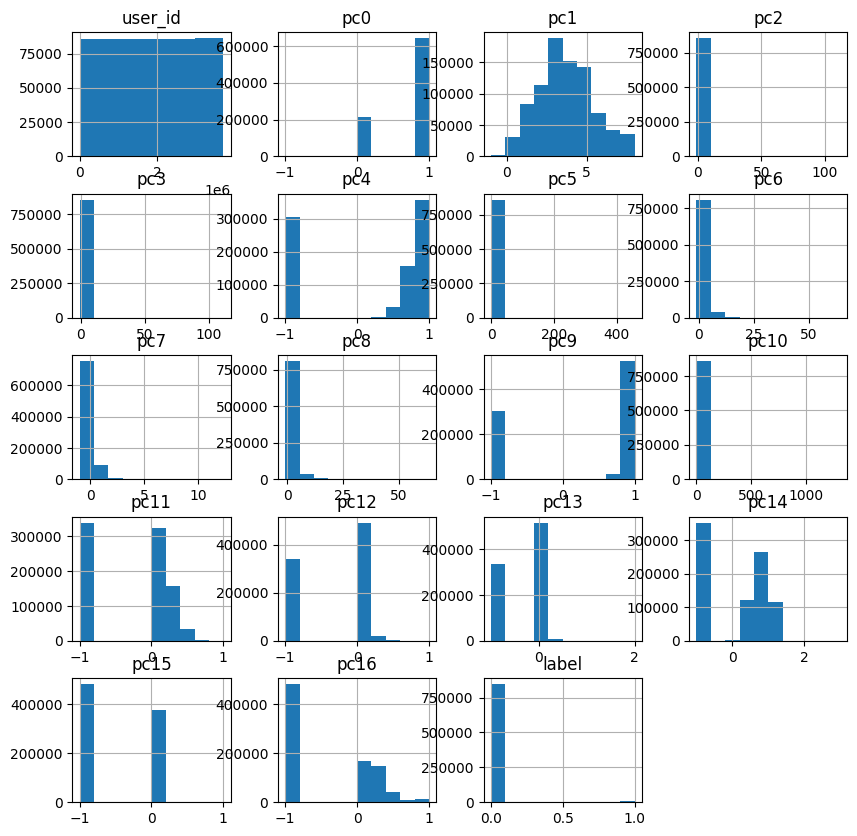

In [ ]:
#histogram
df.hist(bins=10,figsize=(10,10))
plt.show()

In [ ]:
except_id_corr = df.drop(columns = ['user_id']).corr()


Checking Correlations Among The Variables

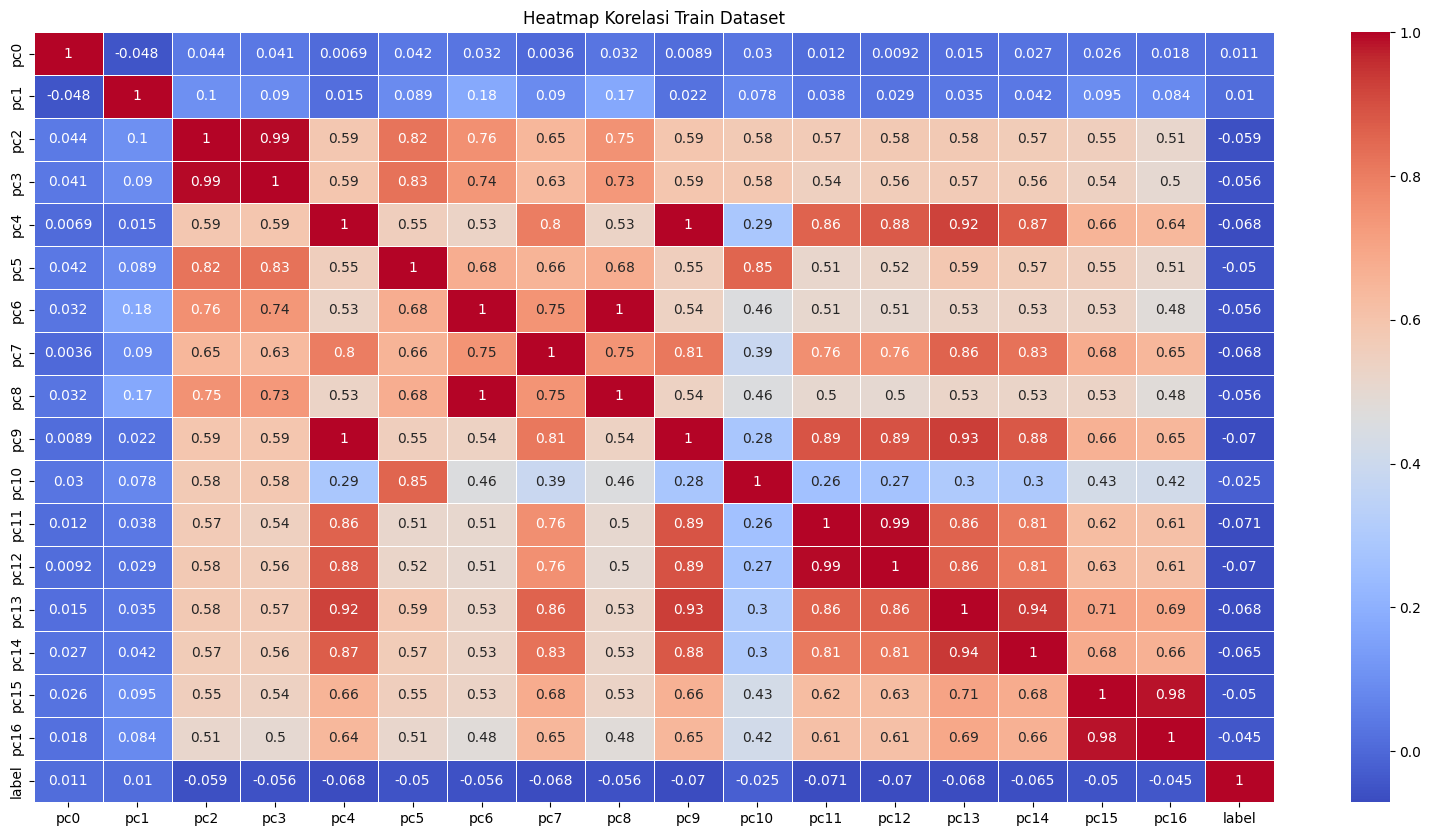

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(except_id_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi Train Dataset")
plt.show()

Distribution of The Label

<ipython-input-23-ec57abaea6e1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['label'],palette='Set1')


<Axes: xlabel='count', ylabel='label'>

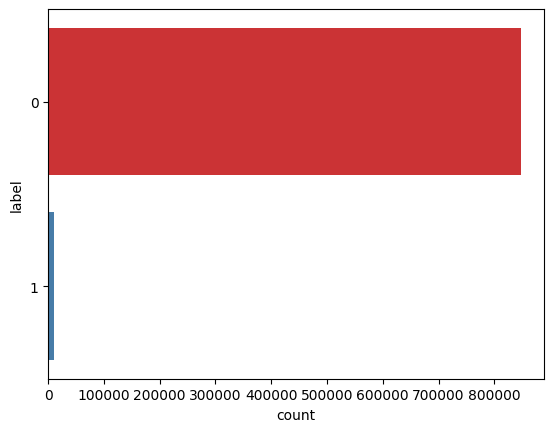

In [ ]:
sns.countplot(y=df['label'],palette='Set1')

<Axes: >

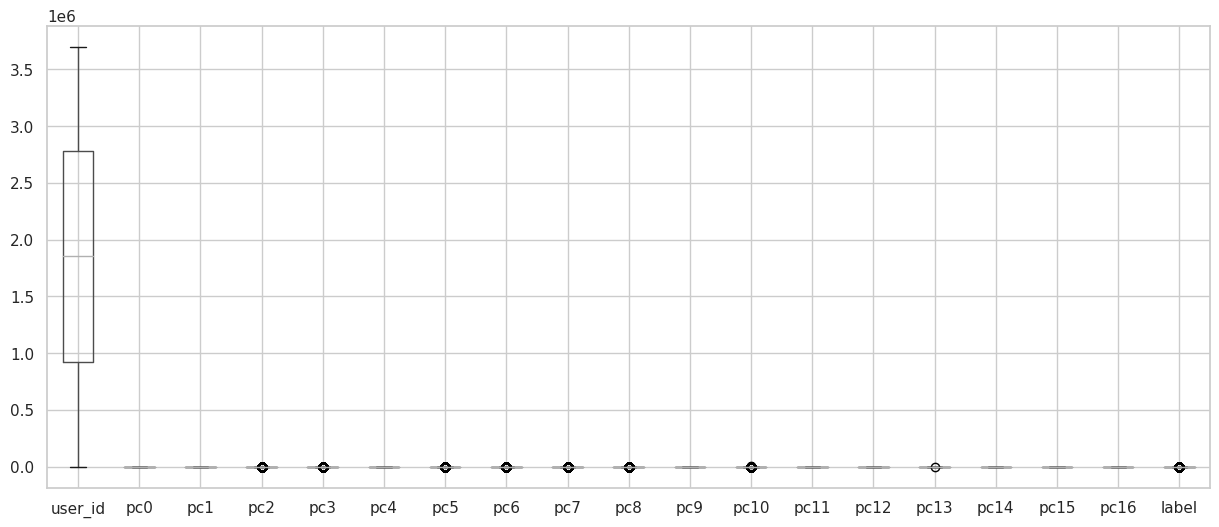

In [ ]:
#box plot for outlier visualization
sns.set(style="whitegrid")
df.boxplot(figsize=(15,6))

Range of Values ​​for Each Variable

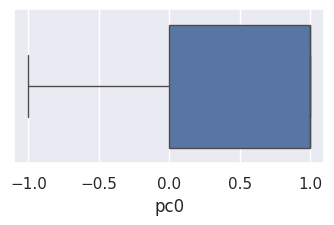

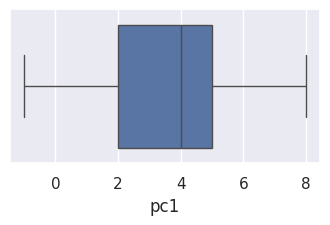

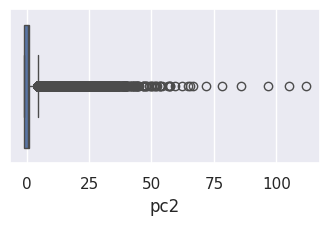

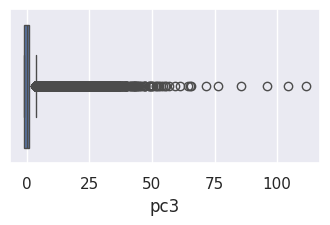

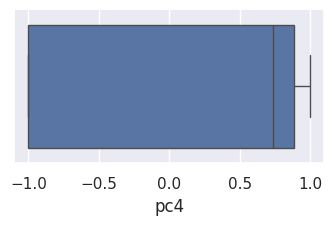

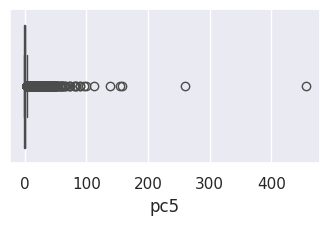

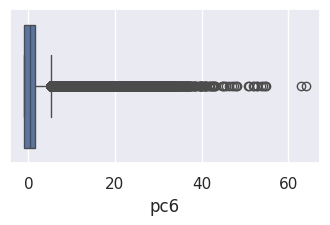

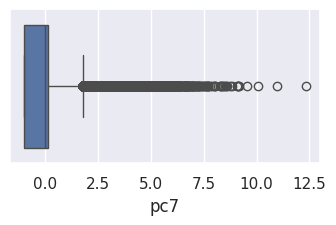

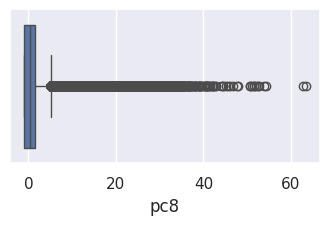

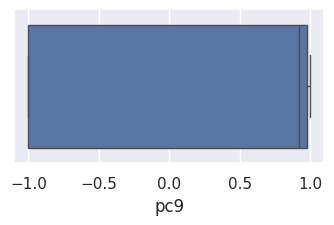

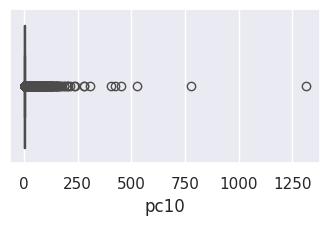

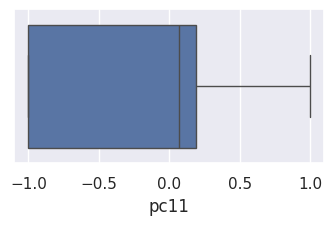

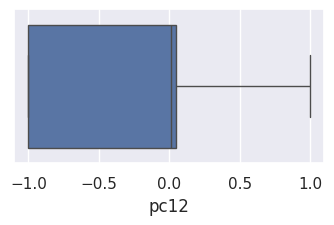

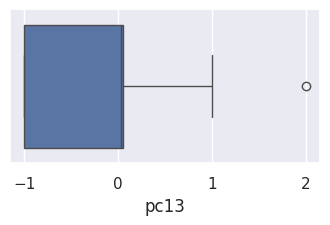

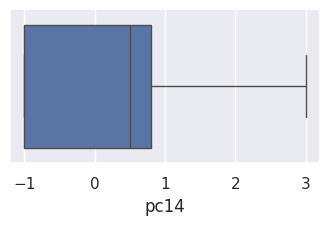

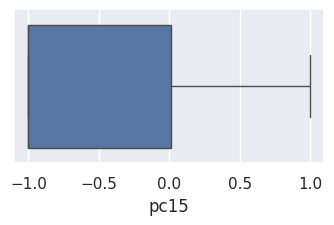

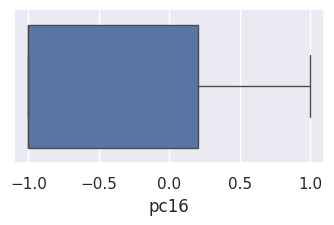

In [ ]:
#box plot
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df['pc0'])
plt.show()
sns.boxplot(x=df['pc1'])
plt.show()
sns.boxplot(x=df['pc2'])
plt.show()
sns.boxplot(x=df['pc3'])
plt.show()
sns.boxplot(x=df['pc4'])
plt.show()
sns.boxplot(x=df['pc5'])
plt.show()
sns.boxplot(x=df['pc6'])
plt.show()
sns.boxplot(x=df['pc7'])
plt.show()
sns.boxplot(x=df['pc8'])
plt.show()
sns.boxplot(x=df['pc9'])
plt.show()
sns.boxplot(x=df['pc10'])
plt.show()
sns.boxplot(x=df['pc11'])
plt.show()
sns.boxplot(x=df['pc12'])
plt.show()
sns.boxplot(x=df['pc13'])
plt.show()
sns.boxplot(x=df['pc14'])
plt.show()
sns.boxplot(x=df['pc15'])
plt.show()
sns.boxplot(x=df['pc16'])
plt.show()

LOAD THE NON-BORROWER DATASET FOR MORE INFO

In [ ]:
non_borrower = pd.read_csv('/content/datathon-2024/ristek-datathon-2024/ristek-datathon-2024/non_borrower_user.csv')

In [ ]:
df.drop(columns = ['user_id']).describe()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,label
count,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.00000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000,857899.000000
mean,0.746870,3.709053,0.545364,0.391718,0.175067,0.315356,0.961431,-0.245161,0.91576,0.251290,1.336002,-0.282764,-0.358987,-0.351351,0.030651,-0.555226,-0.440967,0.012655
std,0.439532,1.934880,1.941448,1.766663,0.880198,1.790893,2.766861,0.696857,2.71027,0.932444,3.565165,0.589381,0.522695,0.518399,0.875284,0.503602,0.644649,0.111782
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,0.000000,2.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,1.000000,4.000000,0.365000,0.295000,0.738007,0.300000,0.312000,0.011000,0.28700,0.922936,0.000000,0.068966,0.011834,0.029297,0.500000,-1.000000,-1.000000,0.000000
75%,1.000000,5.000000,1.150000,0.915000,0.884120,0.900000,1.501000,0.114000,1.43400,0.977522,2.000000,0.187500,0.044816,0.057143,0.800000,0.008230,0.200000,0.000000
max,1.000000,8.000000,111.815000,111.475000,1.000000,456.300000,64.119000,12.338000,63.41600,1.000000,1313.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000


In [ ]:
non_borrower.drop(columns = ['user_id']).describe()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.887829e-01,2.764622e+00,-4.025661e-01,-4.321563e-01,-3.165213e-01,-4.604148e-01,-3.464219e-01,-6.442732e-01,-3.551684e-01,-2.855068e-01,4.385094e-01,-6.227477e-01,-6.537622e-01,-6.519266e-01,-4.526044e-01,-7.981312e-01,-7.348920e-01
std,8.221746e-01,2.870280e+00,9.388054e-01,8.878405e-01,9.028309e-01,9.240246e-01,1.042326e+00,5.216804e-01,1.027156e+00,9.418125e-01,1.587725e+00,5.432509e-01,4.967269e-01,5.023275e-01,8.340102e-01,4.069985e-01,5.439490e-01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
50%,1.000000e+00,3.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
75%,1.000000e+00,5.000000e+00,2.500000e-01,2.150000e-01,8.413886e-01,2.000000e-01,2.330000e-01,7.000000e-03,2.200000e-01,9.568528e-01,0.000000e+00,5.882353e-02,1.142857e-02,3.571429e-02,5.714286e-01,-1.000000e+00,-1.000000e+00
max,1.000000e+00,8.000000e+00,5.176500e+01,5.091500e+01,1.000000e+00,9.180000e+01,3.430200e+01,7.132000e+00,3.406400e+01,1.000000e+00,4.560000e+02,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
user = non_borrower.drop(columns = ['user_id'])

MELAKUKAN FILTER PADA BEBERAPA NILAI UNTUK MASING-MASING VARIABEL

In [ ]:
normal_data_borrower = user[(user['pc0'] == 0) & (user['pc2'] == -1) & (user['pc3'] == -1) & (user['pc4'] == -1) & (user['pc5'] == -1) & (user['pc6'] == -1) & (user['pc7'] == -1) & (user['pc8'] == -1) & (user['pc9'] == -1) & (user['pc10'] == 0) & (user['pc11'] == -1) & (user['pc12'] == -1) & (user['pc13'] == -1) & (user['pc14'] == -1) & (user['pc15'] == -1) & (user['pc16'] == -1)]


In [ ]:
normal_data_borrower.shape[0]

104872

In [ ]:
normal_data_borrower1 = user[(user['pc0'] == 1) & (user['pc2'] == -1) & (user['pc3'] == -1) & (user['pc4'] == -1) & (user['pc5'] == -1) & (user['pc6'] == -1) & (user['pc7'] == -1) & (user['pc8'] == -1) & (user['pc9'] == -1) & (user['pc10'] == 0) & (user['pc11'] == -1) & (user['pc12'] == -1) & (user['pc13'] == -1) & (user['pc14'] == -1) & (user['pc15'] == -1) & (user['pc16'] == -1)]


In [ ]:
normal_data_borrower1.shape[0]

351044

In [ ]:
test_df = pd.read_csv('/content/datathon-2024/ristek-datathon-2024/ristek-datathon-2024/test.csv')
test_df.head()

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
0,4,1.0,2.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,13,1.0,5.0,0.445,0.420,0.943820,0.8,0.783,0.234,0.778,0.993614,2.0,0.056180,0.006386,0.095238,0.750000,0.022472,0.250000
2,37,1.0,6.0,1.680,1.080,0.642857,0.6,1.167,0.046,1.007,0.862896,1.0,0.357143,0.137104,0.027778,0.500000,0.002976,0.166667
3,61,0.0,3.0,1.505,0.875,0.581395,0.9,0.425,0.012,0.286,0.672941,1.0,0.418605,0.327059,0.051429,0.333333,0.003322,0.111111
4,66,1.0,5.0,2.210,1.075,0.486425,1.0,1.349,0.087,1.015,0.752409,2.0,0.513575,0.247591,0.046512,0.800000,0.004525,0.200000


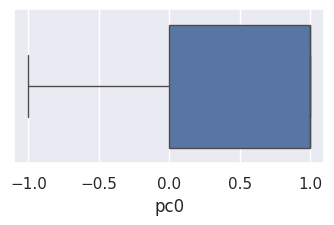

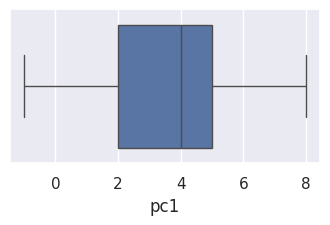

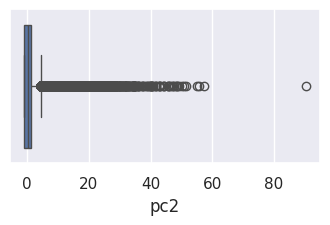

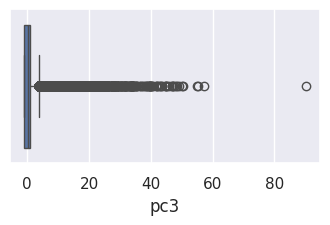

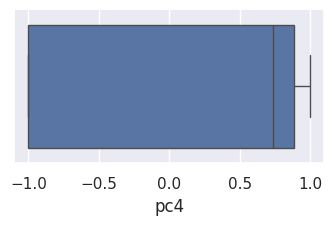

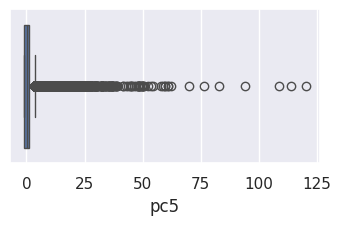

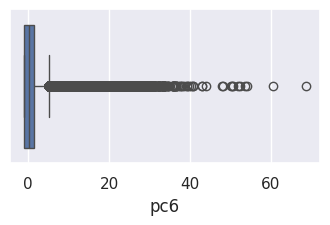

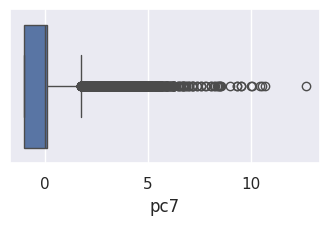

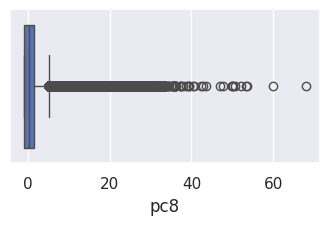

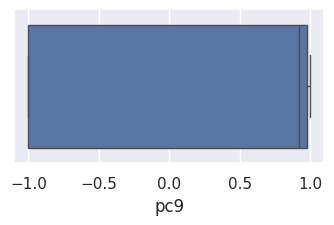

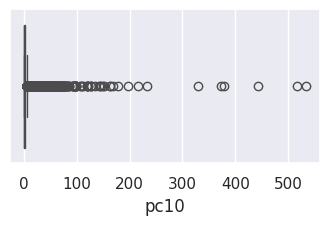

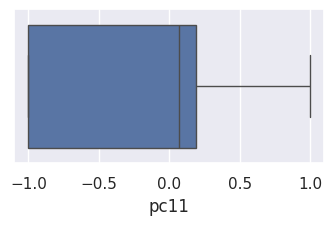

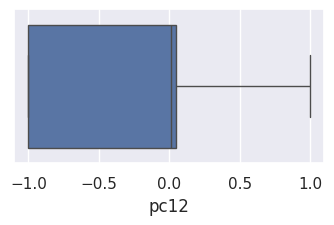

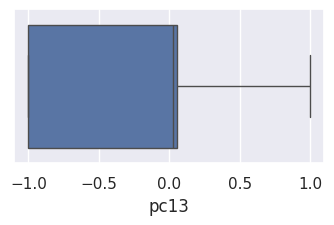

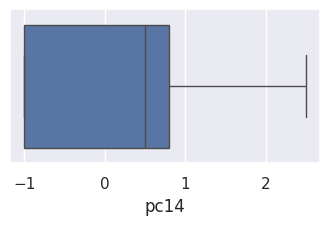

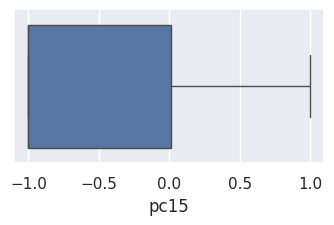

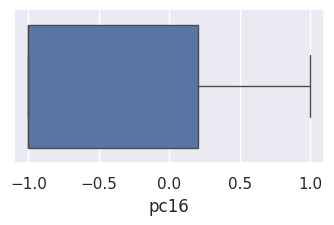

In [ ]:
sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=test_df['pc0'])
plt.show()
sns.boxplot(x=test_df['pc1'])
plt.show()
sns.boxplot(x=test_df['pc2'])
plt.show()
sns.boxplot(x=test_df['pc3'])
plt.show()
sns.boxplot(x=test_df['pc4'])
plt.show()
sns.boxplot(x=test_df['pc5'])
plt.show()
sns.boxplot(x=test_df['pc6'])
plt.show()
sns.boxplot(x=test_df['pc7'])
plt.show()
sns.boxplot(x=test_df['pc8'])
plt.show()
sns.boxplot(x=test_df['pc9'])
plt.show()
sns.boxplot(x=test_df['pc10'])
plt.show()
sns.boxplot(x=test_df['pc11'])
plt.show()
sns.boxplot(x=test_df['pc12'])
plt.show()
sns.boxplot(x=test_df['pc13'])
plt.show()
sns.boxplot(x=test_df['pc14'])
plt.show()
sns.boxplot(x=test_df['pc15'])
plt.show()
sns.boxplot(x=test_df['pc16'])
plt.show()

# PREPROCESSING DATA

SEPARATE THE DATASET BASED ON LABEL

In [ ]:
user1 = df[df['label'] == 1]
user1.shape[0]

10857

Checking Duplicate

PC0 =0

In [ ]:
fraud_data = user1[(user['pc0'] == 0) & (user1['pc2'] == -1) & (user1['pc3'] == -1) & (user1['pc4'] == -1) & (user1['pc5'] == -1) & (user1['pc6'] == -1) & (user1['pc7'] == -1) & (user1['pc8'] == -1) & (user1['pc9'] == -1) & (user1['pc10'] == 0) & (user1['pc11'] == -1) & (user1['pc12'] == -1) & (user1['pc13'] == -1) & (user1['pc14'] == -1) & (user1['pc15'] == -1) & (user1['pc16'] == -1)]
fraud_data.shape[0]

PC0 = 1

In [ ]:
fraud_data = user1[(user['pc0'] == 1) & (user1['pc2'] == -1) & (user1['pc3'] == -1) & (user1['pc4'] == -1) & (user1['pc5'] == -1) & (user1['pc6'] == -1) & (user1['pc7'] == -1) & (user1['pc8'] == -1) & (user1['pc9'] == -1) & (user1['pc10'] == 0) & (user1['pc11'] == -1) & (user1['pc12'] == -1) & (user1['pc13'] == -1) & (user1['pc14'] == -1) & (user1['pc15'] == -1) & (user1['pc16'] == -1)]
fraud_data.shape[0]

In [ ]:
user = df[df['label'] == 0]
user.shape[0]

847042

MENGHAPUS DUPLICATE PADA LABEL BERBEDA UNTUK LABEL 0 SAJA (PC0 = 0)

Nilai Duplikasi ini dihapus khusus untuk data dengan label 1 untuk handling imbalance data dan juga dilihat dari karakteristik yang mirip dengan data pada dataset non-borrower

Nilai pc1 tidak didefinisikan karena setiap nilai pc1 (selama nilai pc lain sama dengan kode di bawah) memiliki duplikasi pada label 1

In [ ]:
normal_data = user[(user['pc0'] == 0) & (user['pc2'] == -1) & (user['pc3'] == -1) & (user['pc4'] == -1) & (user['pc5'] == -1) & (user['pc6'] == -1) & (user['pc7'] == -1) & (user['pc8'] == -1) & (user['pc9'] == -1) & (user['pc10'] == 0) & (user['pc11'] == -1) & (user['pc12'] == -1) & (user['pc13'] == -1) & (user['pc14'] == -1) & (user['pc15'] == -1) & (user['pc16'] == -1)]
user.drop(normal_data.index, inplace=True)

<ipython-input-9-08803db54c20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user.drop(normal_data.index, inplace=True)


MENGHAPUS DUPLICATE PADA LABEL BERBEDA UNTUK LABEL 0 SAJA (PC0 = 1)

Nilai Duplikasi ini dihapus khusus untuk data dengan label 1 untuk handling imbalance data dan juga dilihat dari karakteristik yang mirip dengan data pada dataset non-borrower

Nilai pc1 tidak didefinisikan karena setiap nilai pc1 (selama nilai pc lain sama dengan kode di bawah) memiliki duplikasi pada label 1

In [ ]:
normal_data = user[(user['pc0'] == 1) & (user['pc2'] == -1) & (user['pc3'] == -1) & (user['pc4'] == -1) & (user['pc5'] == -1) & (user['pc6'] == -1) & (user['pc7'] == -1) & (user['pc8'] == -1) & (user['pc9'] == -1) & (user['pc10'] == 0) & (user['pc11'] == -1) & (user['pc12'] == -1) & (user['pc13'] == -1) & (user['pc14'] == -1) & (user['pc15'] == -1) & (user['pc16'] == -1)]
user.drop(normal_data.index, inplace=True)

<ipython-input-10-15c0b23098e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user.drop(normal_data.index, inplace=True)


In [ ]:
normal_data.shape[0]

221345

In [ ]:
user.shape[0]

847042

MENGHAPUS DATA DUPLICATE SETELAH MENGHAPUS KOLOM USER_ID

In [ ]:
user = user.drop(columns = ['user_id']).drop_duplicates().reset_index(drop=True)

In [ ]:
user1 = user1.drop(columns = ['user_id'])

MENGGABUNGKAN DATA KEMBALI

In [ ]:
df = pd.concat([user, user1])

MEMBERI INDEX BARU

In [ ]:
df = df.reset_index(drop=True)

SEPARATE DATASET BASED ON LABEL

In [ ]:
#separating the data for analysis
df_fraud = df[df['label'] == 1]
df_non_fraud = df[df['label'] == 0]

UNDERSAMPLING (N LABEL 0 = N LABEL 1)

In [ ]:
# build a sample dataset with similar distribution of fraud and non-fraud
df_non_fraud_sample = df_non_fraud.sample(n=df_fraud.shape[0], random_state=42)

In [ ]:
df_non_fraud_sample.shape[0]

10857

In [ ]:
df_fraud.shape[0]

10857

MEMBENTUK DATA TRAIN BARU BERDASAR SAMPLE

In [ ]:
new_df = pd.concat([df_fraud, df_non_fraud_sample], axis = 0)

# FEATURE ENGINEERING

MEMISAHKAN FITUR

In [ ]:
X = new_df.drop(columns=['label'], axis = 1)
y = new_df['label']

MEMBAGI DATA UNTUK TRAIN DAN TEST

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(21714, 17) (17371, 17) (4343, 17)


SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MODELING

TRAINING MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

SEED = 42

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = LogisticRegression(random_state = SEED)

# Define the parameters grid for GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],              # Regularization type
    'solver': ['liblinear', 'saga']       # Solver type
}

# Perform Grid Search CV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate on test set with best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print('Test set accuracy with best model: {:.4f}'.format(test_accuracy))


Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best parameters found:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.83
Test set accuracy with best model: 0.8347


EVALUASI

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      2172
           1       0.94      0.72      0.81      2171

    accuracy                           0.83      4343
   macro avg       0.85      0.83      0.83      4343
weighted avg       0.85      0.83      0.83      4343



RECALL

In [ ]:
recall = recall_score(y_test, y_pred)
print('Recall: {:.4f}'.format(recall))

Recall: 0.7167


AP SCORE

In [ ]:
from sklearn.metrics import classification_report, average_precision_score

AP_score = average_precision_score(y_test, y_pred)
print('Average Precision with best model: {:.4f}'.format(AP_score))

Average Precision with best model: 0.8138


MEMBACA TEST DATASET

In [ ]:
test_df = pd.read_csv('/content/datathon-2024/ristek-datathon-2024/ristek-datathon-2024/test.csv')
test_df.head()

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
0,4,1.0,2.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,13,1.0,5.0,0.445,0.420,0.943820,0.8,0.783,0.234,0.778,0.993614,2.0,0.056180,0.006386,0.095238,0.750000,0.022472,0.250000
2,37,1.0,6.0,1.680,1.080,0.642857,0.6,1.167,0.046,1.007,0.862896,1.0,0.357143,0.137104,0.027778,0.500000,0.002976,0.166667
3,61,0.0,3.0,1.505,0.875,0.581395,0.9,0.425,0.012,0.286,0.672941,1.0,0.418605,0.327059,0.051429,0.333333,0.003322,0.111111
4,66,1.0,5.0,2.210,1.075,0.486425,1.0,1.349,0.087,1.015,0.752409,2.0,0.513575,0.247591,0.046512,0.800000,0.004525,0.200000


CLEANING AND PREDICT TEST DATASET

In [ ]:
# Assuming test_df is your new dataset DataFrame

# Ensure test_df has the same columns as the training data except for 'user_id' and 'label'
X_new = test_df.drop(columns=['user_id'], axis=1)

# Scale the new data using the same scaler
X_new_scaled = scaler.transform(X_new)

# Make predictions on the new data
new_predictions = best_model.predict(X_new_scaled)

MENJADIKAN DATAFRAME

In [ ]:
# Create a DataFrame with 'user_id' and 'label'
prediction_df = pd.DataFrame({
    'user_id': test_df['user_id'],
    'label': new_predictions
})

# Save the predictions to a CSV file
prediction_df.to_csv('new_predictions.csv', index=False)


MENYIMPAN MODEL

In [ ]:
import pickle
import lightgbm

# Penyimpanan model yang telah di-fit(train) dalam format ".pkl"
pickle.dump(model, open('Susu Beruang_Logistic Regression.pkl', 'wb'))

# ANALISIS DAN PEMBAHASAN HASIL

## EDA

Informasi dari dataset memiliki ukuran yang sangat besar di mana dataset yang diberikan memiliki hampir satu juta observasi. Tidak hanya jumlah observasi yang besar, namun juga memiliki fitur yang banyak. Sayangnya, informasi yang diberikan tidak seimbang, yaitu sebagian besar transaksi yaitu sebesar 98.74% bukan merupakan penipuan (Non Fraud) sehingga sulit untuk mengidentifikasi aktivitas penipuan. Seluruh dataset yang digunakan untuk model pelatihan tidak menunjukkan adanya missing values. Selain itu, adanya hampir 400 ribu data duplikasi observasi pada seluruh nilai fitur tetapi dengan pelabelan yang berbeda. Hal ini menyebabkan sulitnya pengambilan keputusan untuk tetap atau tidaknya mempertahankan data. Dengan dataset asli yang sudah dinormalisasi, maka variabel-variabel (pc0-pc16) tampaknya memiliki rentang yang sangat kecil, dengan nilai median mendekati nol. Kotak-kotaknya sangat kecil yang terlihat pada box plot yang dihasilkan menunjukkan variasi minimal di mana nilai-nilai variabel sangat dekat satu sama lain dan distribusinya sempit. Artinya, tidak banyak perbedaan antara nilai variabel dan sebagian besar nilai berkumpul di sekitar pusat distribusi tanpa banyak outlier atau nilai ekstrim. Hal ini mengakibatkan data tersebut lebih abstrak dan menyulitkan dalam memahami pola data. Pada analisis multicollinearity, didapatkan hasil yang menunjukkan bahwa antar variabel memiliki multicollinearity yang tinggi. Sebagai contoh, variabel pc4 dengan pc9, pc8 dengan pc6, memiliki nilai korelasi sempurna yaitu 1. Hal ini dapat mengganggu model karena dapat menyebabkan terjadinya kesalahan dalam prediksi, yaitu overfitting. Multicollinearity memicu masalah overfitting karena model memberikan bobot berlebihan pada variabel yang sangat berkorelasi. Hal ini mengakibatkan model menjadi lebih rumit dan kurang mampu membuat prediksi pada data yang belum pernah ada sebelumnya yang mengakibatkan terjadinya penurunan skor akurasi prediksi. Selain itu, variabel antar dataset yang berkorelasi sangat tinggi dapat pula mengakibatkan redudansi variabel di mana antar variabel yang berkorelasi tinggi membawa informasi yang sama. Hal ini menambah kompleksitas model tanpa meningkatkan kemampuan prediktifnya. Redudansi tidak hanya membuat model lebih sulit memprediksi, tetapi juga memperlambat proses pelatihan dan dapat memperburuk performa model. Namun, cukup sulit bagi kami untuk memutuskan menghapus variabel-variabel tersebut karena variabel tersebut sengaja dikaburkan untuk kepentingan anonimitas.

## Preprocessing

Pada proses ini kami melakukan pemeriksaan pada data null (missing value) dan duplikat. Untuk label 1 hasilnya sebanyak 7109 dan untuk label 0 ada sebanyak 303395

Kami memutuskan untuk menghapus duplicate pada data berlabel 0 karena berdasarkan EDA, diperoleh fakta bahwa terdapat ketidakseimbangan pada data label fraud dan nonfraud yang cukup timpang di mana data dengan label 1 ada sebanyak 10857 dan data dengan label 0 berjumlah 78x lipat dibandingkan data berlabel 1, yakni sebanyak 847042. Sebagai bagian dari solusi untuk mengatasi imbalanced data, kami memutuskan untuk menghapus data dengan label 0 (fraud).

Ditemukan pula bahwa pola pc0 = 0 dan pc1 - pc16 = -1 kecuali pc10 = 0.0, serta pc0 = 1 dan pc1 - pc16 = -1 kecuali pc10 = 0.0 sering muncul dalam dataset non_borrower_user. Mengingat bahwa dataset non_borrower_user tidak digunakan dalam pelatihan model, hal ini memperkuat alasan untuk menghapus seluruh data yang memiliki pola fitur identitas tersebut.


## Modeling

Model regresi logistik dipilih karena mudah diterapkan dan hasilnya mudah diinterpretasikan. Hal ini penting dalam deteksi penipuan, dimana memahami hubungan antara prediktor dan kemungkinan penipuan bisa menjadi sangat penting. Selain itu, regresi logistik dengan regularisasi (L1 atau L2) dapat membantu mengatasi multikolinearitas dengan memberikan penalti pada koefisien yang besar, sehingga mengurangi dampaknya dan berpotensi menghasilkan performa dan stabilitas model yang lebih baik. Regresi logistik juga memberikan perkiraan probabilitas, yang bisa sangat berguna dalam deteksi penipuan untuk menetapkan ambang batas dan membuat keputusan berbasis risiko.
Pada proses prediksi dataset yang diberikan dilihat pula bahwa dataset tersebut beberapa nilai yang tidak diketahui labelnya atau memiliki label ganda apabila dilihat pada data train. Hal ini memberikan keuntungan apabila menggunakan LR, dimana LR sangat efisien untuk mengklasifikasikan catatan yang tidak diketahui. Selain itu, berdasarkan beberapa percobaan yang telah dilakukan, jika dibandingkan dengan algoritma LightGBM, FA-CNN, RLS, model LR memberikan skor presisi rata-rata yang lebih baik. LightGBM memberikan AP score , FA-CNN  , RLS 0.6774, dan LR 0.8138. Hal ini menunjukkan bahwa model LR memberikan nilai average precision score yang lebih baik.


# KESIMPULAN

Dari analisis yang telah dilakukan, dapat disimpulkan bahwa logistic regression merupakan model yang cukup efektif dalam mendeteksi penipuan finansial pada platform fintech. Model ini dipilih karena kemudahan penerapannya dan interpretasi yang jelas, yang sangat penting dalam memahami hubungan antara prediktor dan kemungkinan terjadinya penipuan. Meskipun tantangan seperti data yang sangat besar, multikolinearitas, dan ketidakseimbangan kelas data dihadapi, teknik preprocessing yang tepat seperti penghapusan data duplikat dan penggunaan regularisasi dalam model regresi logistik membantu meningkatkan performa dan stabilitas model. Setelah berhasil melakukan beberapa submisi, kelompok kami memilih dua submisi dengan skor AP 0.02 dan 0.01949.







# DAFTAR PUSTAKA

Ali A, Razak SA, Othman SH, Eisa TAE, Al-Daqhm A, Nasser M, Elhassan T, Elshafie H, Saif A. 2022. Financial Fraud Detection Based on Machine Learning: A Systematic Literature Review. Applied Sciences. 12(9): 9637. https://doi.org/10.3390/app12199637.

James G, Witten D, Hastie T, Tibshirani R. 2013. An Introduction to Statistical Learning: with Applications in R. New York (NY): Springer

Kumar Y, S Sameeka, Payal R. 2020. Comparative analysis for fraud detection using logistic regression, random forest, and support vector machine. SSRN Electric Journal. 7(4):728. http://dx.doi.org/10.2139/ssrn.3751339.

Trivedi NK, Simaiya S, Lilhore UK, Sharma SK. 2020. An Efficient Credit Card Detection Model Based on Machine Learning Method. International Journal of Advanced Science and Technology. 29 (5): 3414 - 3424.
